# Comparison of Machine Learning regression models
Uploading data, importing libraries

In [ ]:
!pip install pingouin
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
from sklearn.preprocessing import MinMaxScaler
import math
import pingouin as pg
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

# Reading data
data = pd.read_csv('dane_3.csv')
#Information about fields in the table
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acousticness        3614 non-null   float64
 1   danceability        3614 non-null   float64
 2   duration_ms         3614 non-null   float64
 3   energy              3614 non-null   float64
 4   instrumentalness    3614 non-null   float64
 5   liveness            3614 non-null   float64
 6   loudness            3614 non-null   float64
 7   speechiness         3614 non-null   float64
 8   tempo               3614 non-null   float64
 9   valence             3614 non-null   float64
 10  popularity          3614 non-null   float64
 11  key                 3614 non-null   int64  
 12  mode                3614 non-null   int64  
 13  streaming_platform  3614 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 395.4+ KB


In [ ]:
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,streaming_platform
0,0.251266,0.491589,202686.386243,0.735014,0.021607,0.220297,-5.913217,0.059281,119.755273,0.449164,48.546737,7,1,Spotify
1,0.184074,0.595094,200241.498148,0.748717,0.000029,0.222492,-6.196219,0.048718,110.246598,0.611644,54.556481,11,1,Spotify
2,0.137922,0.467667,241247.555556,0.641889,0.032414,0.110778,-8.370444,0.039644,163.291667,0.270233,26.222222,2,1,Apple Music
3,0.095935,0.693500,167717.500000,0.782000,0.000012,0.155950,-7.007500,0.113950,125.498000,0.621500,56.500000,6,0,Spotify
4,0.918000,0.389000,241933.000000,0.447000,0.904000,0.087800,-18.247000,0.043900,130.270000,0.197000,0.000000,2,1,Spotify


# **Part 1 - Exploratory Research**

## 1.1 Deleting columns, which are not numerical and may interrupt analysis

In [ ]:
data.drop(columns = ['streaming_platform', 'key', 'mode','loudness'], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      3614 non-null   float64
 1   danceability      3614 non-null   float64
 2   duration_ms       3614 non-null   float64
 3   energy            3614 non-null   float64
 4   instrumentalness  3614 non-null   float64
 5   liveness          3614 non-null   float64
 6   speechiness       3614 non-null   float64
 7   tempo             3614 non-null   float64
 8   valence           3614 non-null   float64
 9   popularity        3614 non-null   float64
dtypes: float64(10)
memory usage: 282.5 KB


## 1.2 Deleting duplicates

In [ ]:
# data.duplicated() outputs series, where: True - duplicate, False - unique value
duplicates = data.duplicated()
# indeksy zduplikowanych wierszy
indexes = duplicates[duplicates].index.values
indexes

array([ 360,  409,  737,  870,  912, 1025, 1079, 1224, 1334, 1335, 1354,
       1436, 1504, 1514, 1541, 1555, 1716, 1775, 1821, 1849, 1868, 1932,
       1944, 1975, 1976, 1990, 2004, 2020, 2061, 2162, 2167, 2317, 2349,
       2362, 2411, 2430, 2460, 2502, 2506, 2518, 2526, 2543, 2570, 2579,
       2595, 2597, 2651, 2684, 2722, 2743, 2748, 2774, 2785, 2786, 2814,
       2884, 2890, 2910, 2940, 2963, 2984, 3060, 3129, 3133, 3137, 3150,
       3191, 3242, 3256, 3257, 3264, 3358, 3362, 3366, 3382, 3430, 3441,
       3443, 3476, 3496, 3512, 3535, 3545, 3565, 3597])

In [ ]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3529 entries, 0 to 3613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      3529 non-null   float64
 1   danceability      3529 non-null   float64
 2   duration_ms       3529 non-null   float64
 3   energy            3529 non-null   float64
 4   instrumentalness  3529 non-null   float64
 5   liveness          3529 non-null   float64
 6   speechiness       3529 non-null   float64
 7   tempo             3529 non-null   float64
 8   valence           3529 non-null   float64
 9   popularity        3529 non-null   float64
dtypes: float64(10)
memory usage: 303.3 KB


## 1.3 Scaling variables (standarisation/normalisation)

In [ ]:
#Scales of variables

data.loc[100]

,100
acousticness,0.2800
danceability,0.7240
duration_ms,207333.0000
energy,0.6470
instrumentalness,0.0000
liveness,0.1020
speechiness,0.0658
tempo,106.9600
valence,0.4350
popularity,84.0000


The scales are various, therefore standarisation is needed

In [ ]:
scaler = MinMaxScaler()
data_scal = scaler.fit_transform(data)
data_scal = pd.DataFrame(data_scal, columns = data.columns)
data_scal.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,speechiness,tempo,valence,popularity
0,0.252272,0.471768,0.106418,0.734632,0.021781,0.218940,0.040046,0.449671,0.455617,0.533481
1,0.184811,0.584869,0.104903,0.748380,0.000029,0.221366,0.028545,0.397522,0.622244,0.599522
2,0.138473,0.445627,0.130312,0.641196,0.032676,0.097898,0.018665,0.688444,0.272119,0.288156
3,0.096317,0.692400,0.084750,0.781774,0.000012,0.147823,0.099570,0.481167,0.632351,0.620879
4,0.921686,0.359667,0.130737,0.445657,0.911290,0.072502,0.023299,0.507339,0.197017,0.000000


## 1.4 Describing basic statistics

In [ ]:
data_scal.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,speechiness,tempo,valence,popularity
count,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000
mean,0.356968,0.569989,0.127419,0.582241,0.149183,0.182719,0.078962,0.452350,0.503378,0.556432
std,0.303247,0.175251,0.048843,0.213495,0.237112,0.108100,0.098607,0.118803,0.206416,0.245219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.094877,0.458437,0.102186,0.448413,0.000009,0.110328,0.025270,0.379820,0.354913,0.406593
50%,0.264686,0.576884,0.121015,0.615402,0.017979,0.164456,0.044359,0.446989,0.509345,0.533136
75%,0.590360,0.698093,0.142442,0.737628,0.203799,0.216084,0.087920,0.505474,0.650297,0.824176
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1.5 Visualisation - histograms, boxplots

<Axes: >

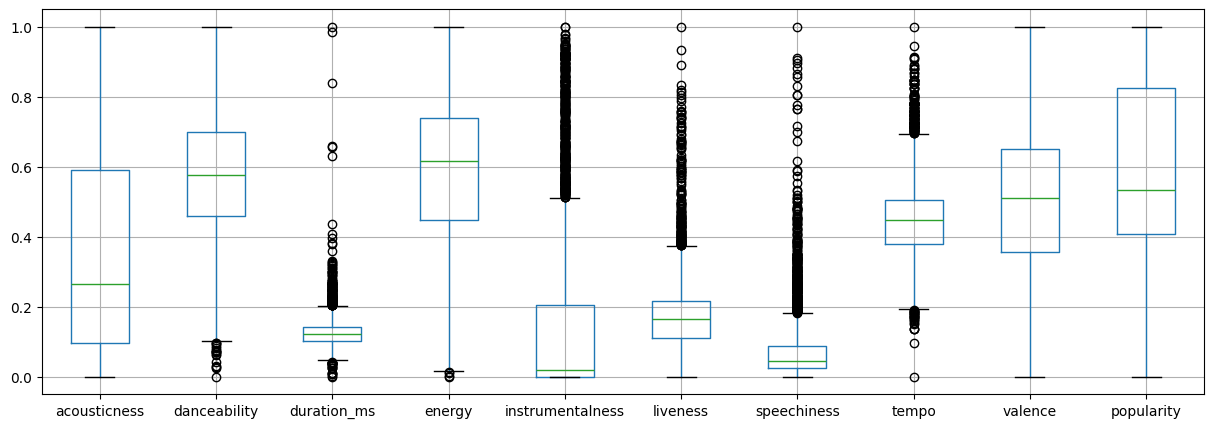

In [ ]:
# boxplots
data_scal.boxplot(figsize =(15,5))

18


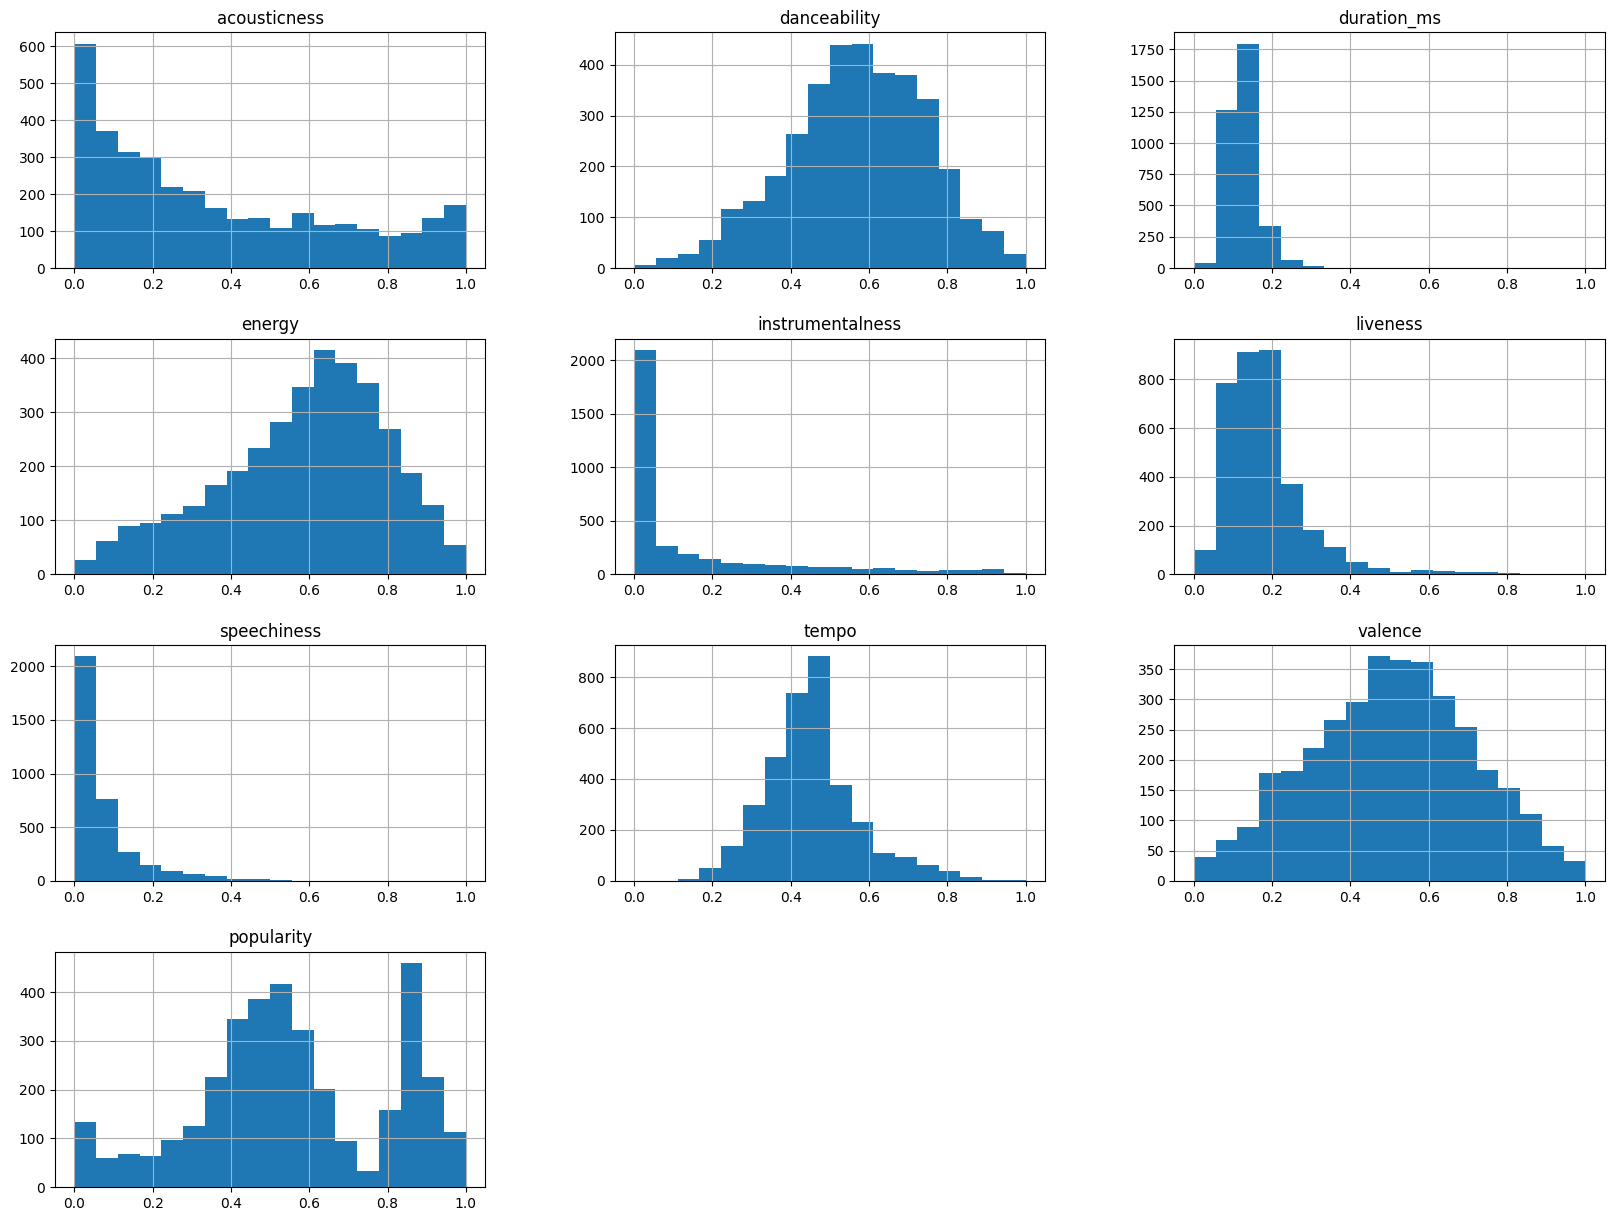

In [ ]:
#histograms
k1 = round(5*math.log10(data_scal.shape[0]))
print(k1)

data_scal.hist(bins = k1, figsize=(20,15))
plt.show()

## 1.6 Filtering dataset

In [ ]:
data_scal = data_scal.replace(0, np.nan)
data_scal = data_scal.dropna()

# deleting observation of variables of choice
data_scal = data_scal[data_scal['danceability'] > 0.1]
data_scal = data_scal[data_scal['duration_ms'] < 0.2]
data_scal = data_scal[data_scal['instrumentalness'] < 0.5]
data_scal = data_scal[data_scal['liveness'] < 0.4]
data_scal = data_scal[data_scal['speechiness'] < 0.19]
data_scal = data_scal[(data_scal['tempo'] > 0.2) & (data_scal['tempo'] < 0.8)]

data_scal.reset_index(drop=True, inplace=True)

## 1.7 Correlation Analysis

For Pearson’s correlation coefficients:

H₀: There is no linear correlation between the variables in the population. The true Pearson correlation coefficient (denoted as ρ) is equal to 0.

H₁: There is a linear correlation between the variables in the population. The true Pearson correlation coefficient (denoted as ρ) is not equal to 0.

*Adopted significance level:* α = 0.05 (5%)

In [ ]:
from scipy.stats import pearsonr

# Matrix of correlations (Pearson)
corr_matrix = data_scal.corr(method='pearson')
print("\nCorrelation Matrix (Pearson):")
print(corr_matrix)


Correlation Matrix (Pearson):
                  acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.207896    -0.142761 -0.845318   
danceability         -0.207896      1.000000    -0.135827  0.147084   
duration_ms          -0.142761     -0.135827     1.000000  0.064497   
energy               -0.845318      0.147084     0.064497  1.000000   
instrumentalness      0.164375     -0.322704     0.251577 -0.161197   
liveness             -0.020808     -0.210541    -0.016915  0.083010   
speechiness          -0.168665      0.240948    -0.094642  0.208860   
tempo                -0.292786     -0.059253     0.009258  0.321422   
valence              -0.041649      0.451406    -0.147736  0.179586   
popularity           -0.479701      0.441949    -0.016128  0.359170   

                  instrumentalness  liveness  speechiness     tempo   valence  \
acousticness              0.164375 -0.020808    -0.168665 -0.292786 -0.041649   
danceability             

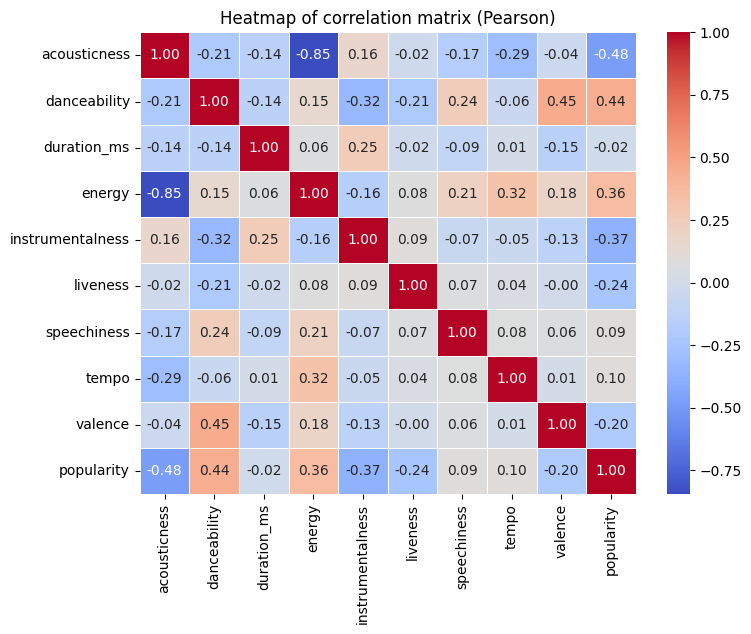

In [ ]:
# Visualization (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of correlation matrix (Pearson)')
plt.show()

---

**CONCLUSIONS:**    
Based on the correlation heatmap, the null hypothesis (H₀) _**should be rejected**_ for most variables and the alternative hypothesis (H₁) should be accepted.

The vast majority of the data shows negative or positive correlation between variables, the strongest negative correlation is between *acousticness* and *energy*.

The variables **liveness** and **duration_ms** stand out due to their consistently low correlation coefficients, which remain close to zero for the majority of relationships.

Variable **liveness** demonstrates minimal linear relationships with other variables, with correlation values mostly between -0.24 and +0.09. This suggests that it does not contribute meaningful information about dependencies within the dataset.

Variable **duration_ms** also shows weak correlations with all other features, indicating that track duration does not significantly affect or relate to the acoustic or popularity characteristics considered.

***Therefore, both variables should be removed from further analysis to reduce noise and improve the overall interpretability and efficiency of subsequent models.***

---

In [ ]:
data_scal.drop(columns = ['liveness','duration_ms'], inplace = True)

In [ ]:
data_scal.head()

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,popularity
0,0.252272,0.471768,0.734632,0.021781,0.040046,0.449671,0.455617,0.533481
1,0.184811,0.584869,0.748380,0.000029,0.028545,0.397522,0.622244,0.599522
2,0.138473,0.445627,0.641196,0.032676,0.018665,0.688444,0.272119,0.288156
3,0.096317,0.692400,0.781774,0.000012,0.099570,0.481167,0.632351,0.620879
4,0.516701,0.533201,0.599407,0.050505,0.040535,0.464561,0.730188,0.327877


# **Part 2 - Analysis**
## 2.1 Regression analysis using Artificial Neural Networks for selected features

**Objectives:**

- Selection of hyperparameters
- Evaluation of learning curves

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import scipy as scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Neural layers - activation: RelU
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[7]),
    layers.Dense(30, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1),                     # Output layer
])


model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 50)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,857 (11.16 KB)

 Trainable params: 2,857 (11.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Optimalization
model.compile(
    optimizer='adam',
    loss='mae'
)
model.summary()

#Division into training set and validation set
df_train = data_scal.sample(frac = 0.8, random_state = 42)
df_valid = data_scal.drop(df_train.index)
display(df_train.head(5))
display(df_valid.head(5))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 50)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,857 (11.16 KB)

 Trainable params: 2,857 (11.16 KB)

 Non-trainable params: 0 (0.00 B)

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,popularity
529,0.130758,0.811142,0.671491,0.000163,0.038188,0.372033,0.547532,0.691392
1455,0.068816,0.454890,0.805552,0.000369,0.034464,0.573536,0.578457,0.546660
382,0.041890,0.562450,0.844192,0.283128,0.082865,0.503805,0.456438,0.499577
585,0.285488,0.479768,0.767496,0.000367,0.162647,0.572067,0.410465,0.410820
1864,0.911312,0.578211,0.152047,0.004381,0.025622,0.430705,0.379218,0.186813


,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,popularity
1,0.184811,0.584869,0.748380,0.000029,0.028545,0.397522,0.622244,0.599522
8,0.204591,0.604506,0.610467,0.006304,0.096699,0.387006,0.469292,0.680018
14,0.003822,0.460197,0.764718,0.000743,0.017746,0.356840,0.471857,0.835165
16,0.360440,0.381521,0.677427,0.000005,0.071098,0.286305,0.167277,0.868132
21,0.213778,0.807682,0.735872,0.000020,0.162912,0.744599,0.774514,0.604396


In [ ]:
#Defining the objective - determining popularity of a song, based on selected features during exploratory data analysis (EDA)

y_train = df_train['popularity']
y_valid = df_valid['popularity']
X_train = df_train.drop('popularity', axis=1)
X_valid = df_valid.drop('popularity', axis=1)

print(X_train.shape)

(1670, 7)


Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0725 - val_loss: 0.0850
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0748 - val_loss: 0.0816
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0754 - val_loss: 0.0863
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0745 - val_loss: 0.0813
Epoch 5/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0716 - val_loss: 0.0818
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0756 - val_loss: 0.0832
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0740 - val_loss: 0.0824
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0723 - val_loss: 0.0821
Epoch 9/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0751 - val_loss: 0.0808
Epoch 10/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0723 - val_loss: 0.0817
Epoch 11/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0746 - val_loss: 0.0816
Epoch 12/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0746 - val_lo

(np.float64(0.0), np.float64(14.7), np.float64(0.0), np.float64(0.3))

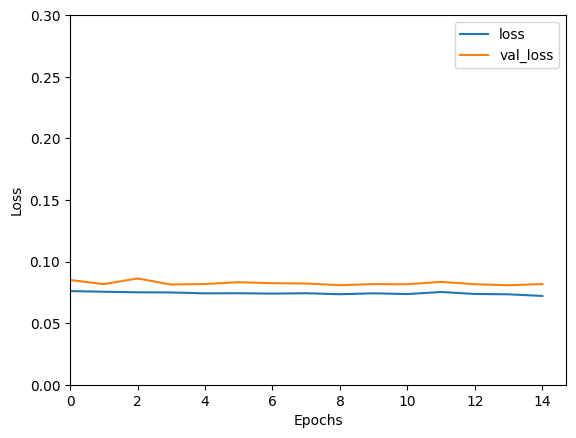

In [ ]:
#Training the network
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 28,
    epochs = 15,
)

# Learning history
history_df = pd.DataFrame(history.history)

#Scaled plot
history_df.plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.axis([0, None, 0, 0.3])

## Loss curve assesment

Based on the graph - parameters (batch size, number of epochs, number of layers and ReLU coefficients) are well optimized.
- The curves are close to each other, have similar shape and keep a stable, low value (<0.10)
- There are no rapid events and graphs don't have unconvergences

This means _**model is not overlearned, nor underlearned**_

##**Determination of errors and determination coefficients**


In [ ]:
from sklearn.metrics import r2_score
# prediction
y_pred = model.predict(X_valid).flatten()

# metrics
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.2f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MSE:  0.01
RMSE: 0.11
MAE:  0.08
R²:   0.68


## 2.2 Regression model *Lasso*

**Goals:**

- Selection of hyperparameters
- Selection of features with RFE method
- Testing the features selection influence on results
- Re-selection of hyperparameters

In [ ]:
import pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
!pip install pingouin

In [ ]:
data_scal.tail()

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,popularity
2083,0.200165,0.562756,0.599645,0.000005,0.017704,0.393969,0.724623,0.458922
2084,0.118395,0.638791,0.782945,0.039085,0.044838,0.451005,0.541075,0.589262
2085,0.008531,0.689668,0.715554,0.000009,0.013717,0.407330,0.514929,0.857143
2086,0.508920,0.571592,0.501596,0.009153,0.034891,0.436527,0.629976,0.433325
2087,0.640055,0.477774,0.393576,0.000008,0.028376,0.556177,0.390731,0.635400


Classes are equal in size => Splitting data into test set and train set

In [ ]:
X = data_scal.copy()
X = X.drop('popularity', axis = 1)
Y = data_scal['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)


Lasso(alpha=1)

### **Determination coefficient:**

**R² coefficient** for test data and train data:


In [ ]:
print('R² train', round(reg.score(X_train, y_train), 2))
print('R² test', round(reg.score(X_test, y_test), 2))

R² train 0.0
R² test -0.0


In [ ]:
print(reg.coef_)

[-0.  0.  0. -0.  0.  0. -0.]


Determination coefficient R² - indicating what part of the data is expressed by a model - is 0.
This means that the value of **α** hyperparameter is too big and needs to be reduced.

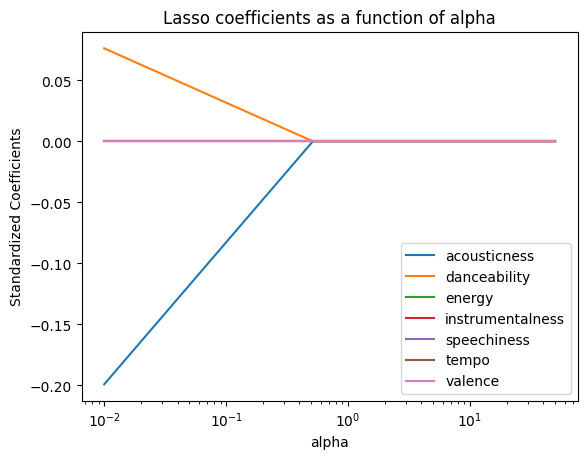

In [ ]:
alphas = np.linspace(0.01,50,100)
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.legend(X)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [ ]:
model = LassoCV(cv = 7, random_state = 42, max_iter = 10000)

# Fitting the model
model.fit(X_train, y_train)

model.alpha_

np.float64(0.0001112591471468369)

In [ ]:
# Model for determined alpha
lasso_best = Lasso(alpha = model.alpha_)
lasso_best.fit(X_train, y_train)

# Regression coeffs

print(list(zip(lasso_best.coef_, X)))


[(np.float64(-0.17650441873015282), 'acousticness'), (np.float64(0.7598981136194641), 'danceability'), (np.float64(0.15376690197724005), 'energy'), (np.float64(-0.332199684950432), 'instrumentalness'), (np.float64(-0.4280479155053083), 'speechiness'), (np.float64(-0.0), 'tempo'), (np.float64(-0.547829226620205), 'valence')]


**Visualization of MSE vs. alpha for each data split (cross-validation):**

(np.float64(1.8195839197921875e-05),
 np.float64(0.036305472240847105),
 np.float64(0.0157371018650253),
 np.float64(0.04691244338605998))

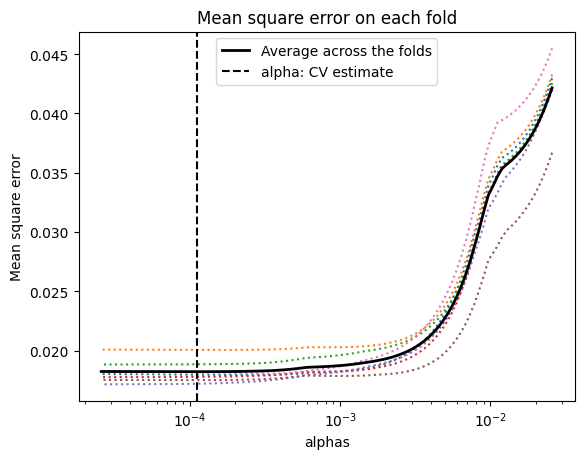

In [ ]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

### After re-selection of α hyperparameter:

In [ ]:
print('R² train:', round(lasso_best.score(X_train, y_train), 2))
print('R² test:', round(lasso_best.score(X_test, y_test), 2))

R² train: 0.57
R² test: 0.59


###**CONCLUSIONS**
After selecting the appropriate hyperparameter α, the R² values are around **0.57-0.59**. The models accuracy has seamingly improved.

Based on the graphs for subsequent α hyperparameters, it was decided in the second step to limit ourselves only to the features visible in the graph, i.e. *acousticness, danceability, valence*.

However, before that, errors were determined for the results above:

In [ ]:
# MSE Training data
pred_train = lasso_best.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE (Mean Square Error) for training data:', round(mse_train, 2))

# MAE Training data
mae_train = mean_absolute_error(y_train, pred_train)
print('MAE (Mean Absolute Error) for training data:', round(mae_train, 2))

# MSE Test data
pred = lasso_best.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print('MSE (Mean Square Error) for test data:', round(mse_test, 2))

# MAE Test data
mae_test = mean_absolute_error(y_test, pred)
print('MAE (Mean Absolute Error) for test data:', round(mae_test, 2))

MSE (Mean Square Error) for training data: 0.02
MAE (Mean Absolute Error) for training data: 0.1
MSE (Mean Square Error) for test data: 0.02
MAE (Mean Absolute Error) for test data: 0.1


## 2.2 **Further part:** Re-selecting hyperparameter α after features selection

In [ ]:
data_scal.head()

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,popularity
0,0.252272,0.471768,0.734632,0.021781,0.040046,0.449671,0.455617,0.533481
1,0.184811,0.584869,0.748380,0.000029,0.028545,0.397522,0.622244,0.599522
2,0.138473,0.445627,0.641196,0.032676,0.018665,0.688444,0.272119,0.288156
3,0.096317,0.692400,0.781774,0.000012,0.099570,0.481167,0.632351,0.620879
4,0.516701,0.533201,0.599407,0.050505,0.040535,0.464561,0.730188,0.327877


In [ ]:
# Data split
data_scal.drop(columns = ['energy','speechiness','tempo','instrumentalness'], inplace = True)
data_scal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   acousticness  2088 non-null   float64
 1   danceability  2088 non-null   float64
 2   valence       2088 non-null   float64
 3   popularity    2088 non-null   float64
dtypes: float64(4)
memory usage: 65.4 KB


In [ ]:
X = data_scal.copy()
X = X.drop('popularity', axis = 1)
Y = data_scal['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
# Selecting alpha parameter

alphas = np.linspace(0.01,50,100)
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

In [ ]:
model = LassoCV(cv = 5, random_state = 42, max_iter = 10000)

# Fitting model
model.fit(X_train, y_train)

print("Dopasowana alpha:", model.alpha_)

Dopasowana alpha: 2.570230602298307e-05


In [ ]:
# Model for chosen alpha
lasso_best = Lasso(alpha = model.alpha_)
lasso_best.fit(X_train, y_train)

# Regression coeffs

print(list(zip(lasso_best.coef_, X)))

[(np.float64(-0.27272185098974344), 'acousticness'), (np.float64(0.8145803838006827), 'danceability'), (np.float64(-0.520726535373366), 'valence')]


### After re-selecting α hyperparameter:

In [ ]:
print('R² train' , round(lasso_best.score(X_train, y_train), 2))
print('R² test', round(lasso_best.score(X_test, y_test), 2))


R² train 0.52
R² test 0.56


###**Errors:**

In [ ]:
# MSE Training data
pred_train = lasso_best.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE (Mean Square Error) for training data:', round(mse_train, 2))

# MAE Training data
mae_train = mean_absolute_error(y_train, pred_train)
print('MAE (Mean Absolute Error) for training data:', round(mae_train, 2))

# MSE Test data
pred = lasso_best.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print('MSE (Mean Square Error) for test data:', round(mse_test, 2))

# MAE Test data
mae_test = mean_absolute_error(y_test, pred)
print('MAE (Mean Absolute Error) for test data:', round(mae_test, 2))

MSE (Mean Square Error) for training data: 0.02
MAE (Mean Absolute Error) for training data: 0.1
MSE (Mean Square Error) for test data: 0.02
MAE (Mean Absolute Error) for test data: 0.1


### **CONCLUSIONS:**
Limiting the model features to three main ones and adjusting the alpha parameter to them did not improve the model's results.

The values achieved are very similar to the previous ones, where all features participated in the model, yet slightly worse:
- Decrease in training R²: from 0.57 to 0.52
- Decrease in test R²: from 0.59 to 0.56
---
In summary - the impact of removed features is minimal for both the test and training data sets.

The error values determined for the training and test sets did not change.

The model with a limited number of features (three) learns almost exactly the same as the model with all available features, yet slightly worse, as evidenced by the results achieved. This indicates the redundancy or low significance of the removed features; the general structure of the model has been preserved despite the reduction in its features.

##2.3 Random Forest Regressor

**Goals:**

- Selection of hyperparameters
- Selection of features with RFE method
- Testing the features selection influence on results
- Re-selection of hyperparameters

In [ ]:
# Because of using and modifying previous data - I upload the original data set once again.
#Deleting columns rejected in previous analysis and filtering the dataset.

data = pd.read_csv('dane_3.csv')
data.drop(columns = ['streaming_platform', 'key', 'mode','loudness'], inplace = True)
duplikaty = data.duplicated()
indeksy_wierszy = duplikaty[duplikaty].index.values
data = data.drop_duplicates()
scaler = MinMaxScaler()
data_scal = scaler.fit_transform(data)
data_scal = pd.DataFrame(data_scal, columns = data.columns)
data_scal.head()
data_df = pd.DataFrame(data_scal)

data_scal = data_scal.replace(0, np.nan)
data_scal = data_scal.dropna()

# deleting observation of variables of choice
data_scal = data_scal[data_scal['danceability'] > 0.1]
data_scal = data_scal[data_scal['duration_ms'] < 0.2]
data_scal = data_scal[data_scal['instrumentalness'] < 0.5]
data_scal = data_scal[data_scal['liveness'] < 0.4]
data_scal = data_scal[data_scal['speechiness'] < 0.19]
data_scal = data_scal[(data_scal['tempo'] > 0.2) & (data_scal['tempo'] < 0.8)]

data_scal.reset_index(drop=True, inplace=True)
data_scal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2088 non-null   float64
 1   danceability      2088 non-null   float64
 2   duration_ms       2088 non-null   float64
 3   energy            2088 non-null   float64
 4   instrumentalness  2088 non-null   float64
 5   liveness          2088 non-null   float64
 6   speechiness       2088 non-null   float64
 7   tempo             2088 non-null   float64
 8   valence           2088 non-null   float64
 9   popularity        2088 non-null   float64
dtypes: float64(10)
memory usage: 163.3 KB


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Data split
X = data_scal.copy()
X = X.drop('popularity', axis = 1)
Y = data_scal['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

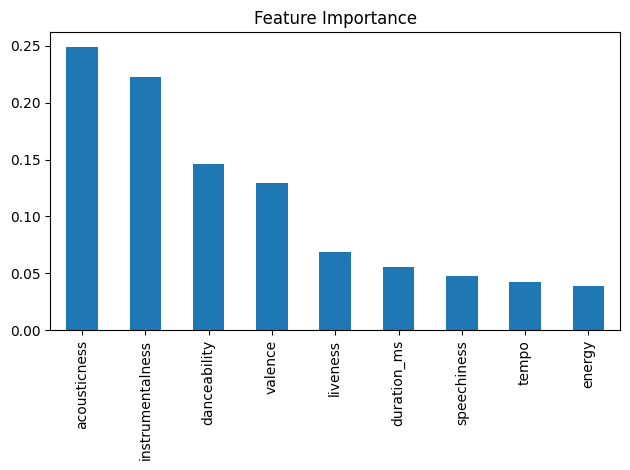

In [ ]:
#Exploring feature importance
importances = rf.feature_importances_
features = X.columns

feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
#Determining error values and R²

# MSE Training data
pred_train = rf.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE (Mean Square Error) for training data:', round(mse_train, 2))

# MAE Training data
mae_train = mean_absolute_error(y_train, pred_train)
print('MAE (Mean Absolute Error) for training data:', round(mae_train, 2))

# MSE Test data
pred = rf.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print('MSE (Mean Square Error) for test data:', round(mse_test, 2))

# MAE Test data
mae_test = mean_absolute_error(y_test, pred)
print('MAE (Mean Absolute Error) for test data:', round(mae_test, 2))

r2 = r2_score(y_test, pred)

print(f'R²: {r2:.2f}')


MSE (Mean Square Error) for training data: 0.0
MAE (Mean Absolute Error) for training data: 0.03
MSE (Mean Square Error) for test data: 0.01
MAE (Mean Absolute Error) for test data: 0.08
R²: 0.69


# **Conclusion (summary, model comparison)**

The following error values and R² determination coefficients were obtained for the methods used in the task:

##**1. Regression analysis using artificial neural networks**
- R²:   0.68
- MSE:  0.01
- RMSE: 0.12
- MAE:  0.08

##**2. Regression analysis using the Lasso model**

For the full model, with 8 features:
- R² (training): 0.57
- R² (test): 0.59
- MSE (for both sets): 0.02
- MAE (for both sets): 0.1

For the model limited to 3 features (acousticness, danceability, valence):
- Training R² after alpha selection: 0.52
- Test R² after alpha selection: 0.56
- MSE (for both sets): 0.02
- MAE (for both sets): 0.1

##**3. Regression analysis using the Random Forest Regressor model**

- R²: 0.69
- MSE (training): 0.0
- MSE (test): 0.01
- MAE (training): 0.03
- MAE (test): 0.8


Based on the results obtained and previous minor conclusions, it can be stated that the largest part of the model is expressed by the regression analysis performed for the RFR (Random Forest Regressor) method. It is characterized by the highest R² value. However, it should be noted that regression analysis using neural networks is only slightly worse (by 0.01). The MAE and MSE errors have the same values for both methods.

The Lasso method proved to be the least suitable method for regression analysis of the selected data. Its results were not bad - the method performed optimally. Reduction of features from 9 to 3 only slightly affected the coefficient of determination and regression error values. Nevertheless, compared to the other two methods, it achieved the weakest results.

The feature importance graphs, drawn in both the Lasso and RFR analyses, are consistent with each other and show that the most important features that can determine the popularity of a song are:
- acousticness
- danceability
- valence
